In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.model_selection import ShuffleSplit
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

In [16]:
url = "https://raw.githubusercontent.com/digipodium/Datasets/main/regression/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

X = df[['Spending Score (1-100)', 'Annual Income (k$)']]
shs = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in shs.split(X):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]

In [15]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


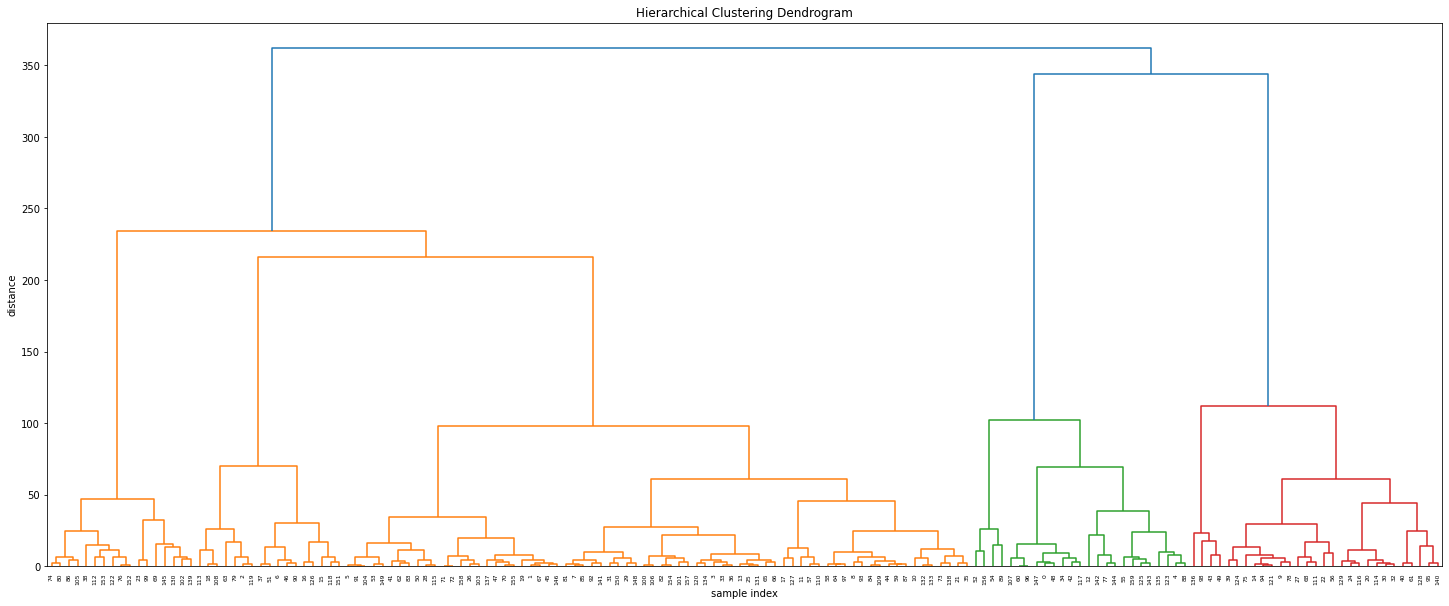

In [20]:
z = linkage(Xtrain,'ward')
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z,
    leaf_rotation=90,
    leaf_font_size=6,
)
plt.show()

In [21]:
model = AgglomerativeClustering(n_clusters=5)
model.fit(Xtrain)

AgglomerativeClustering(n_clusters=5)

In [22]:
df['group'] = model.fit_predict(df[['Spending Score (1-100)', 'Annual Income (k$)']])

In [23]:
px.scatter(df,x='Spending Score (1-100)',y='Annual Income (k$)',color='group',symbol='group')